In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [49]:
img_rows, img_cols = 28, 28
num_classes = 10

In [50]:
def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

In [51]:
with open('fashion-mnist_train.csv') as f:
    lines = (line for line in f if not line.startswith('#'))
    fashion_data = np.loadtxt(lines, delimiter=',', skiprows=1)
    x, y = prep_data(fashion_data)

In [52]:
with open('fashion-mnist_test.csv') as g:
    liness = (line for line in g if not line.startswith('#'))
    fashion_data1 = np.loadtxt(liness, delimiter=',', skiprows=1)
    x1, y1 = prep_data(fashion_data1)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout

In [54]:
batch_size = 16

In [55]:
fashion_model = Sequential()
fashion_model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
fashion_model.add(Conv2D(16, (3, 3), activation='relu'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [56]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
fashion_model.fit(x, y,
          batch_size=batch_size,
          epochs=3,
          validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 116s 2ms/sample - loss: 0.4107 - acc: 0.8528 - val_loss: 0.3123 - val_acc: 0.8844
Epoch 2/3
48000/48000 [==============================] - 117s 2ms/sample - loss: 0.2582 - acc: 0.9055 - val_loss: 0.2827 - val_acc: 0.8983
Epoch 3/3
48000/48000 [==============================] - 118s 2ms/sample - loss: 0.1931 - acc: 0.9283 - val_loss: 0.2476 - val_acc: 0.9128


In [58]:
evaluation=fashion_model.evaluate(x1,y1)
print('Test Accuracy:{:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 339us/sample - loss: 0.2322 - acc: 0.9142
Test Accuracy:0.914


In [62]:
pred=fashion_model.predict_classes(x1)

In [ ]:
#Visualizing the Test Data Predictions: 

In [63]:
import matplotlib.pyplot as plt

0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] T Shirt
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Trouser
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Pullover
6 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Shirt
3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Dress
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Pullover
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] Bag
4 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Coat
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Sandal
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] T Shirt
3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Dress
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Coat
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Coat
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Shirt
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] Bag
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Sandal
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Shirt
3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] Dress
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] Shirt
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Coat
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Coat
4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Coat
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Pullover
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Trouser
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0

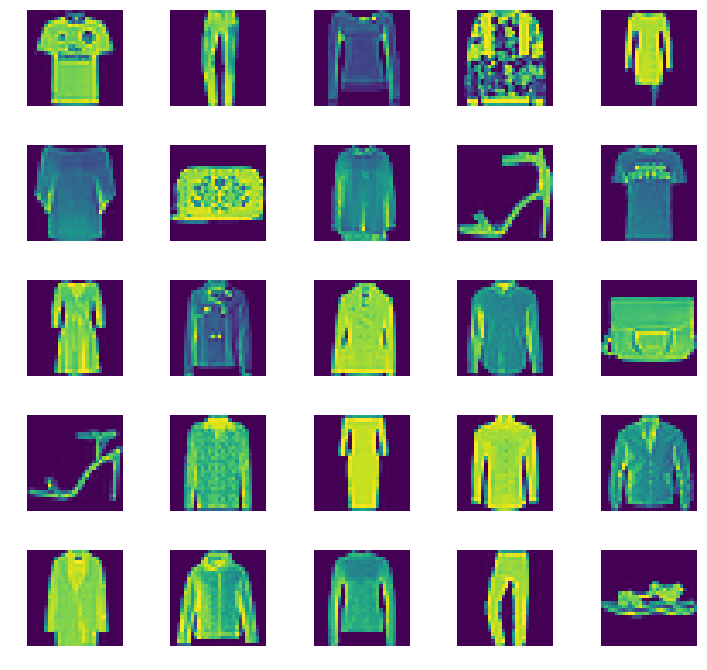

In [76]:
L=5
W=5


fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    
    if(pred[i]==0):
        x = 'T Shirt'
    elif(pred[i]==1):
        x = 'Trouser'
    elif(pred[i]==2):
        x = 'Pullover' 
    elif(pred[i]==3):
        x = 'Dress'
    elif(pred[i]==4):
        x = 'Coat'
    elif(pred[i]==5):
        x = 'Sandal'
    elif(pred[i]==6):
        x = 'Shirt'
    elif(pred[i]==7):
        x = 'Sneaker'
    elif(pred[i]==8):
        x = 'Bag'
    elif(pred[i]==9):
        x = 'Ankle Boot'
    
    print(pred[i] , y1[i], x)
    axes[i].imshow(x1[i].reshape(28,28))
    axes[i].axis('off')
    
    
plt.subplots_adjust(wspace=0.5)